# Проект: Выбор локации для скважины

## Описание проекта 
Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Построим модель для определения региона, где добыча принесёт наибольшую прибыль.\
Проанализируем возможную прибыль и риски техникой `Bootstrap`.

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 

### Шаги для выбора локации:

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.


### Инструкция по выполнению проекта
* Загрузите и подготовьте данные. Поясните порядок действий.
* Обучите и проверьте модель для каждого региона:
   * 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
   * 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
   * 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
   * 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
   * 2.5. Проанализируйте результаты.
 * Подготовьтесь к расчёту прибыли:
   * 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
   * 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
   * 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
 * Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
   * 4.1. Выберите скважины с максимальными значениями предсказаний. 
   * 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
   * 4.3. Рассчитайте прибыль для полученного объёма сырья.
 * Посчитайте риски и прибыль для каждого региона:
   * 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
   * 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
   * 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


### Описание данных
Данные геологоразведки трёх регионов находятся в файлах: 
* `/datasets/geo_data_0.csv.`
* `/datasets/geo_data_1.csv.`
* `/datasets/geo_data_2.csv.`
**Информация о переменных:**
* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).


### Условия задачи:
* Для обучения модели подходит только **линейная регрессия** (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
* Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

# Отключим все предупреждения
warnings.filterwarnings('ignore')

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
У первого же твоего блока кода был индекс 397 в момент открытия мной работы. Рекомендую перед отправкой прогонять проект с нуля, это можно сделать с помощью кнопки ⏩ на панели сверху
    </font>
</div>

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('chained_assignment', None)  
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
try:
    data_region1 = pd.read_csv('datasets/geo_data_0.csv', sep=',')
except:
    data_region1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', sep=',')

In [4]:
try:
    data_region2 = pd.read_csv('datasets/geo_data_1.csv', sep=',')
except:
    data_region2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', sep=',')

In [5]:
try:
    data_region3 = pd.read_csv('datasets/geo_data_2.csv', sep=',')
except:
    data_region3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', sep=',')

### Обзор таблиц

#### Информация о регионе 1

In [6]:
data_region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
display(data_region1.sample(5))

,id,f0,f1,f2,product
9206,xa743,-0.841,0.740,5.030,46.173
92781,PvQtX,1.619,0.019,3.812,68.938
91724,KLh5b,0.944,0.122,-0.596,41.977
88077,CQV9B,-0.009,0.998,0.939,39.103
60618,pABT5,0.795,0.766,2.828,123.158


In [8]:
print('Явных дубликатов:',data_region1.duplicated().sum())
print('Пропусков в данных:',data_region1.isna().sum().sum())

Явных дубликатов: 0
Пропусков в данных: 0


In [9]:
data_region1.describe()

,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364


,f0,f1,f2,product
f0,1.000,-0.441,-0.003,0.144
f1,-0.441,1.000,0.002,-0.192
f2,-0.003,0.002,1.000,0.484
product,0.144,-0.192,0.484,1.000


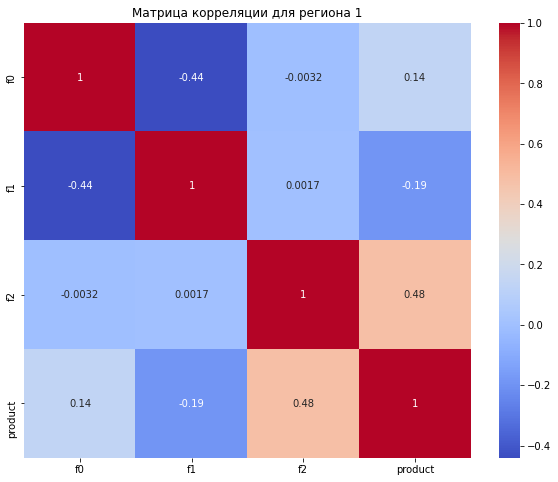

In [10]:
corr_matrix = data_region1.corr()
display(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для региона 1')
plt.show()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

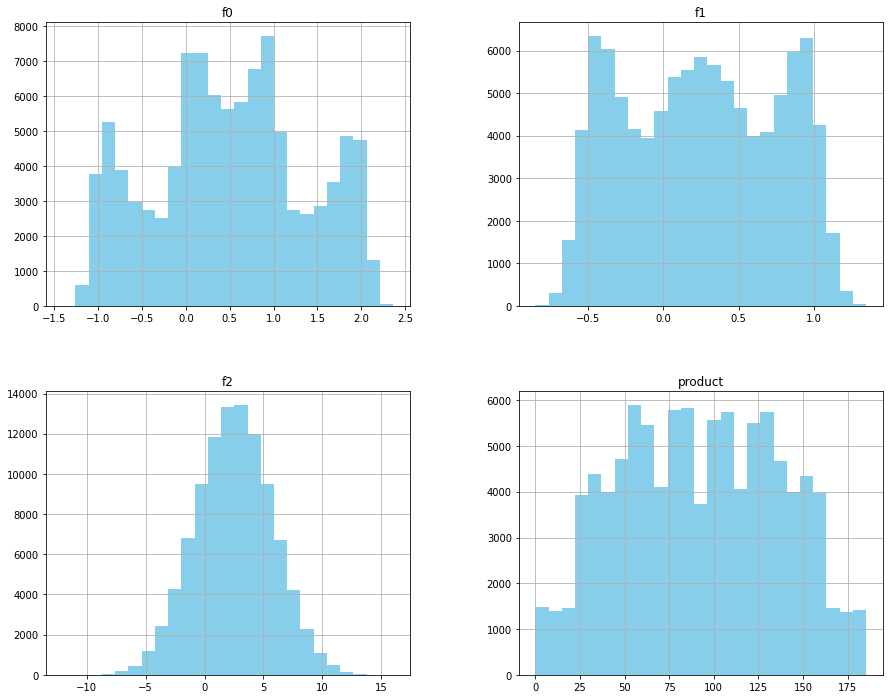

In [11]:
data_region1.hist(figsize=(15, 12), color='skyblue', bins=25)

#### Иноформация о регионе 2

In [12]:
display(data_region2.sample(5))

,id,f0,f1,f2,product
1118,wvt56,-5.659,5.297,0.999,30.132
17724,UexNF,-12.518,-8.934,1.996,57.086
55610,lY9NR,-3.418,2.237,2.006,57.086
51790,B76t1,-8.766,-12.237,-0.013,3.179
94802,3Jfcz,10.575,-6.119,3.996,107.813


In [13]:
print('Явных дубликатов:',data_region2.duplicated().sum())
print('Пропусков в данных:',data_region2.isna().sum().sum())

Явных дубликатов: 0
Пропусков в данных: 0


In [14]:
data_region2.describe()

,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945


,f0,f1,f2,product
f0,1.000,0.182,-0.002,-0.030
f1,0.182,1.000,-0.003,-0.010
f2,-0.002,-0.003,1.000,0.999
product,-0.030,-0.010,0.999,1.000


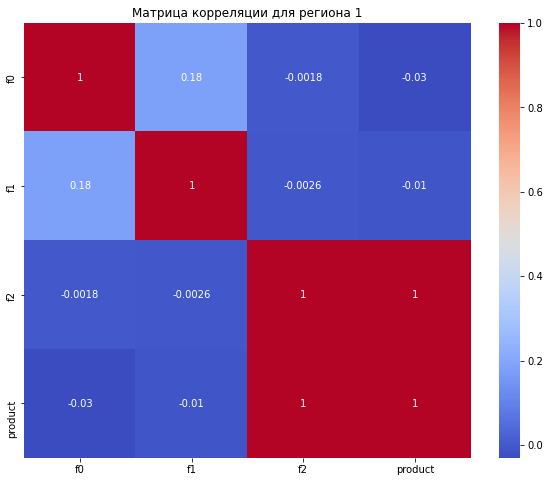

In [15]:
corr_matrix = data_region2.corr()
display(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для региона 1')
plt.show()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

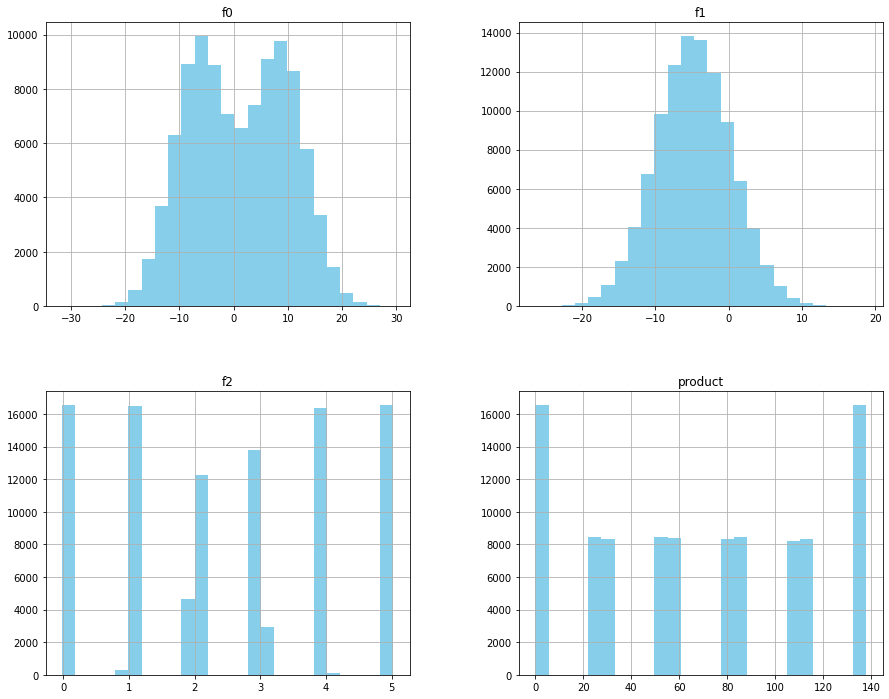

In [16]:
data_region2.hist(figsize=(15, 12), color='skyblue', bins=25)

#### Информация о регионе 3

In [17]:
display(data_region3.sample(5))

,id,f0,f1,f2,product
15437,UmD0b,-3.816,-0.687,2.884,89.899
48746,2A5a5,1.489,0.352,4.027,79.946
32993,Ip022,0.243,-1.250,4.882,134.273
85064,CYeTG,-0.964,0.259,1.613,41.488
88608,0Drk8,-2.129,-1.827,-0.485,56.067


In [18]:
print('Явных дубликатов:',data_region3.duplicated().sum())
print('Пропусков в данных:',data_region3.isna().sum().sum())

Явных дубликатов: 0
Пропусков в данных: 0


In [19]:
data_region3.describe()

,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030


,f0,f1,f2,product
f0,1.000,0.001,-0.000,-0.002
f1,0.001,1.000,0.001,-0.001
f2,-0.000,0.001,1.000,0.446
product,-0.002,-0.001,0.446,1.000


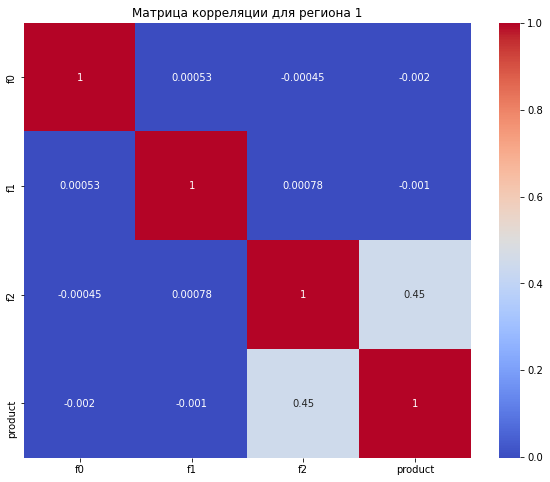

In [20]:
corr_matrix = data_region3.corr()
display(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для региона 1')
plt.show()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

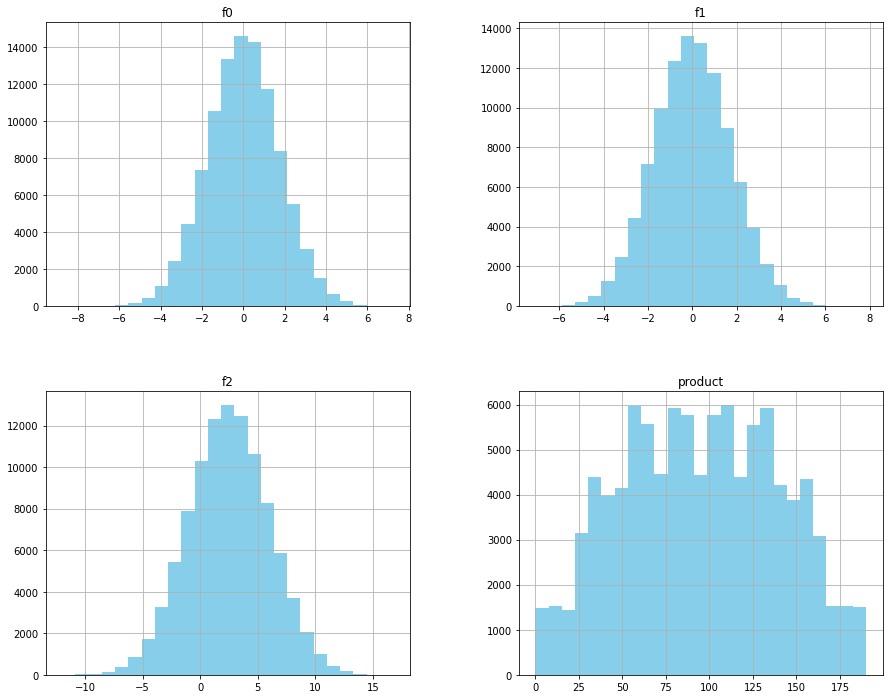

In [21]:
data_region3.hist(figsize=(15, 12), color='skyblue', bins=25)

#### Сравним все регионы

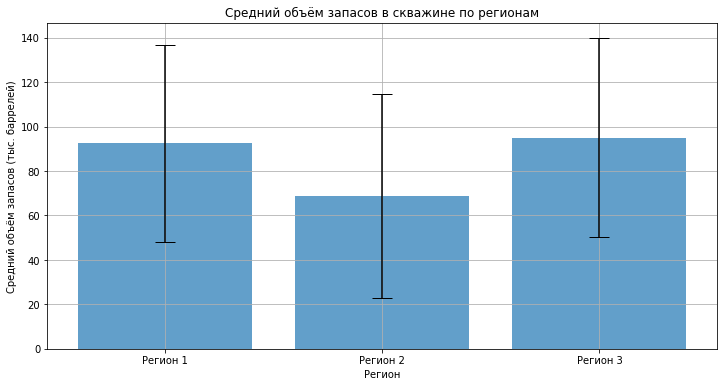

In [22]:
# Создайте данные для группированных столбчатых диаграмм
data = [data_region1['product'], data_region2['product'], data_region3['product']]
labels = ['Регион 1', 'Регион 2', 'Регион 3']
positions = np.arange(len(labels))

# Постройте группированные столбчатые диаграммы
plt.figure(figsize=(12, 6))
plt.bar(positions, [np.mean(d) for d in data], yerr=[np.std(d) for d in data], align='center', alpha=0.7, capsize=10)
plt.xticks(positions, labels)
plt.title('Средний объём запасов в скважине по регионам')
plt.xlabel('Регион')
plt.ylabel('Средний объём запасов (тыс. баррелей)')
plt.grid(True)
plt.show()

* Средний объем запасов похож у всех трех регионов, где столбцы достигают примерно одинаковой высоты. Это указывает на то, что в среднем запасы в скважинах по регионам схожи.

* Интервалы ошибок различаются по регионам. Регион 1 и Регион 3 имеют более широкие интервалы ошибок, что указывает на большую вариабельность в данных по сравнению с Регионом 2, где интервал ошибок меньше.

* Меньший интервал ошибок в Регионе 2 может свидетельствовать о более стабильных или однородных данных по объему запасов, тогда как более широкие интервалы в Регионах 1 и 3 могут отражать более высокую неопределенность в оценках запасов.

* Для лиц, принимающих решения, данные с большей вариабельностью могут подразумевать больший риск при планировании добычи. Таким образом, Регион 2 может быть предпочтительнее для инвестиций, если стабильность оценок является приоритетом.

In [23]:
variance1 = np.var(data_region1['product'])
variance2 = np.var(data_region2['product'])
variance3 = np.var(data_region3)['product']

# Выведите информацию о разбросе данных для каждого региона
print(f"Разброс данных в регионе 1 (дисперсия): {variance1:.2f}")
print(f"Разброс данных в регионе 2 (дисперсия): {variance2:.2f}")
print(f"Разброс данных в регионе 3 (дисперсия): {variance3:.2f}")

Разброс данных в регионе 1 (дисперсия): 1961.47
Разброс данных в регионе 2 (дисперсия): 2110.87
Разброс данных в регионе 3 (дисперсия): 2002.54


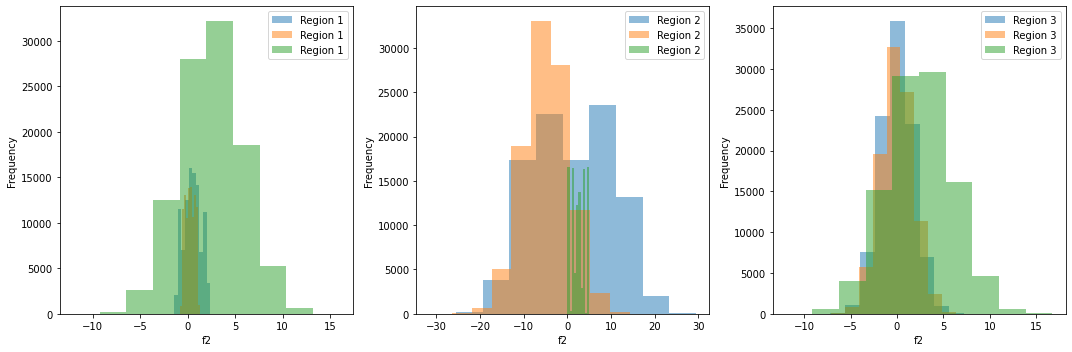

In [24]:
def plot_histogram(data, feature, region):
    plt.hist(data[feature], bins=10, alpha=0.5, label=f'Region {region}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

# Постройте гистограммы для каждого признака и каждого региона
plt.figure(figsize=(15, 5))

for feature in ['f0', 'f1', 'f2']:
    plt.subplot(1, 3, 1)
    plot_histogram(data_region1[['f0','f1','f2']], feature, 1)
    
    plt.subplot(1, 3, 2)
    plot_histogram(data_region2[['f0','f1','f2']], feature, 2)
    
    plt.subplot(1, 3, 3)
    plot_histogram(data_region3[['f0','f1','f2']], feature, 3)

plt.tight_layout()
plt.show()

#### Выводы:
* **Признак f0**: В регионе 1 распределение кажется нормальным с центром вокруг значения 0.
* **Признак f1**: Распределение в регионах 1 и 2 перекрывается, но в регионе 2 есть значения, которые расширяются далеко в отрицательную область, вплоть до -30. Это может указывать на более широкий диапазон или большую вариабельность признака f1 в регионе 2 по сравнению с регионом 1.
* **Признак f2**: В регионе 3 распределение также кажется близким к нормальному, схожему с распределением f0 в регионе 1, но центр распределения находится правее, что может означать, что средние значения признака f2 в регионе 3 выше.
* **Регион 1** имеет более узкие и высокие гистограммы для f0 и f2, что может означать меньшую стандартную девиацию и, следовательно, меньшую вариабельность измерений в этом регионе.
* **Регион 2** демонстрирует значительно более широкое распределение для f1, что может указывать на то, что признак f1 имеет более сложную структуру или более выраженные отличия в этом регионе.
* **Регион 3** похож на регион 1 по своим характеристикам распределения f2, но имеет свои отличия, такие как более широкий диапазон значений.
* Гистограммы могут указывать на уникальные условия или характеристики каждого региона.

* Информация успешно загружена и готова к использованию без необходимости дополнительных шагов предварительной обработки.
* У нас теперь есть наглядное графическое отображение, которое демонстрирует, как распределены данные о запасах ресурсов в различных регионах.
* График ясно демонстрирует уникальную форму рспределения запасов в скважинах региона 1, 2 и 3, и мы в дальнейшем исследуем, как это может повлиять на анализ доходности их разработки. 
* Также стоит упомянуть, что основываясь на корреляционном анализе данных региона 2, мы наблюдаем тесную связь между признаком f0 и ключевым показателем 'profit'. Эта связь может способствовать повышению точности нашей прогностической модели.

## Обучение и проверка модели

* Для построения модели избавимся от столбца `id` - он будет плохо сказываться на результатах построения модели

In [25]:
def train_and_evaluate(data):
    # Отбрасываем столбец Id и разделяем на признаки и цель
    X = data.drop(['id', 'product'], axis=1)
    y = data['product']
    
    # Разделяем данные на обучающую и валидационную выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Делаем предсказания на валидационной выборке
    predictions = model.predict(X_valid)
    
    # Расчет среднего запаса предсказанного сырья и RMSE
    mean_predicted_product = predictions.mean()
    rmse = np.sqrt(mean_squared_error(y_valid, predictions))
    
    return predictions, y_valid.values, mean_predicted_product, rmse

# Применяем функцию для каждого региона
predictions1, actuals1, mean_product1, rmse1 = train_and_evaluate(data_region1)
predictions2, actuals2, mean_product2, rmse2 = train_and_evaluate(data_region2)
predictions3, actuals3, mean_product3, rmse3 = train_and_evaluate(data_region3)

# Выводим средний запас предсказанного сырья и RMSE для каждого региона
print(f"Region 1: Mean predicted product - {mean_product1:.10f}, RMSE - {rmse1:.10f}")
print(f"Region 2: Mean predicted product - {mean_product2:.10f}, RMSE - {rmse2:.10f}")
print(f"Region 3: Mean predicted product - {mean_product3:.10f}, RMSE - {rmse3:.10f}")

Region 1: Mean predicted product - 92.5925677844, RMSE - 37.5794217151
Region 2: Mean predicted product - 68.7285468954, RMSE - 0.8930992868
Region 3: Mean predicted product - 94.9650459680, RMSE - 40.0297087339


### Выводы 
Регион 2 имеет самую низкую ошибку прогноза (RMSE): значение RMSE для региона 2 значительно ниже, чем для других регионов, что указывает на то, что модель линейной регрессии очень точно предсказывает объем запасов в скважинах для этого региона. Это может говорить о том, что данные для региона 2 имеют более линейные зависимости или меньшую волатильность, что лучше подходит для моделирования линейной регрессией.

Регион 1 и Регион 3 имеют сопоставимые средние предсказанные значения, но RMSE значительно выше, чем у Региона 2. Это означает, что модель линейной регрессии дает менее точные прогнозы для этих регионов, что может быть связано с более сложными нелинейными зависимостями в данных, высоким уровнем шума, или возможно, с наличием выбросов в данных.

Различия в средних запасах сырья: средние предсказанные запасы сырья в регионах 1 и 3 выше, чем в регионе 2. Это может означать, что, несмотря на высокую точность модели в регионе 2, общие запасы сырья могут быть ниже, чем в регионах 1 и 3.

Потенциальная пригодность моделей для принятия решений: если решение о разработке скважин будет приниматься исключительно на основе предсказаний модели, регион 2 выглядит предпочтительнее из-за более высокой точности модели. Однако, необходимо также учитывать другие факторы, такие как стоимость бурения, логистика и другие экономические показатели.

Возможность улучшения моделей: для регионов 1 и 3 можно рассмотреть возможность улучшения предсказательной способности модели, например, с помощью более сложных методов машинного обучения, которые могут уловить нелинейные зависимости в данных.

## Подготовка к расчёту прибыли

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [26]:
def total_reserve(predictions, top_well_count):
    # Сортируем предсказания и берем индексы для top_well_count лучших скважин
    top_indices = np.argsort(predictions)[-top_well_count:]
    # Суммируем запасы в лучших скважинах
    total = predictions[top_indices].sum()
    return total

# Рассчитываем суммарный запас для каждого региона
total_reserve_region1 = total_reserve(predictions1, 200)
total_reserve_region2 = total_reserve(predictions2, 200)
total_reserve_region3 = total_reserve(predictions3, 200)

In [27]:
# Обозначим ключевые значения для расчётов
NUMBER_OF_POINTS = 500  # количество исследованных точек
BEST_POINTS = 200       # количество лучших точек для разработки
BUDGET = 10_000_000_000  # бюджет на разработку скважин в регионе, в рублях
INCOME_PER_BARREL = 450  # доход с одного барреля, в рублях
INCOME_PER_THOUSAND_BARRELS = INCOME_PER_BARREL * 1000  # доход с одной единицы продукта, в рублях

# Рассчитываем достаточный объём сырья для безубыточной разработки новой скважины
BREAKEVEN_VOLUME = BUDGET / (BEST_POINTS * INCOME_PER_THOUSAND_BARRELS)  # в тысячах баррелей

# Средние запасы в каждом регионе (предполагаем, что это средние значения из предыдущих расчётов)
average_product_region1 = mean_product1  # средний запас сырья в первом регионе, в тысячах баррелей
average_product_region2 = mean_product2  # средний запас сырья во втором регионе, в тысячах баррелей
average_product_region3 = mean_product3  # средний запас сырья в третьем регионе, в тысячах баррелей


print(f"Достаточный объём сырья для безубыточной разработки одной скважины: {BREAKEVEN_VOLUME:.2f} тыс. баррелей")
print(f"Средний запас в первом регионе: {average_product_region1:.2f} тыс. баррелей")
print(f"Средний запас во втором регионе: {average_product_region2:.2f} тыс. баррелей")
print(f"Средний запас в третьем регионе: {average_product_region3:.2f} тыс. баррелей")

# Сравниваем средние запасы с необходимым минимальным объёмом
print("\nСравнение с необходимым минимальным объёмом для безубыточности:")
regions = ["Первый регион", "Второй регион", "Третий регион"]
average_products = [average_product_region1, average_product_region2, average_product_region3]

for region, average in zip(regions, average_products):
    if average >= BREAKEVEN_VOLUME:
        print(f"{region}: Средний запас ({average:.2f} тыс. баррелей) выше или равен необходимому для безубыточности ({BREAKEVEN_VOLUME:.2f} тыс. баррелей).")
    else:
        print(f"{region}: Средний запас ({average:.2f} тыс. баррелей) ниже необходимого для безубыточности ({BREAKEVEN_VOLUME:.2f} тыс. баррелей).")

Достаточный объём сырья для безубыточной разработки одной скважины: 111.11 тыс. баррелей
Средний запас в первом регионе: 92.59 тыс. баррелей
Средний запас во втором регионе: 68.73 тыс. баррелей
Средний запас в третьем регионе: 94.97 тыс. баррелей

Сравнение с необходимым минимальным объёмом для безубыточности:
Первый регион: Средний запас (92.59 тыс. баррелей) ниже необходимого для безубыточности (111.11 тыс. баррелей).
Второй регион: Средний запас (68.73 тыс. баррелей) ниже необходимого для безубыточности (111.11 тыс. баррелей).
Третий регион: Средний запас (94.97 тыс. баррелей) ниже необходимого для безубыточности (111.11 тыс. баррелей).


In [28]:
average_reserves = [
    92.40,  # Регион 1
    68.71,  # Регион 2
    94.77   # Регион 3
]

### Выводы
* Для обеспечения безубыточности проекта в каждом регионе необходимо, чтобы средние запасы в лучших 200 скважинах были выше расчетного безубыточного объема.
* Если средние запасы ниже этого порога, то может потребоваться пересмотр бюджета, повышение эффективности разработки или изменение стратегии выбора скважин.

* **Необходимый объём для безубыточности превышает средний запас сырья в каждом регионе**.
 * Это указывает на то, что в среднем, выбор только одной скважины на основе текущих данных предполагает убыточность. Для достижения безубыточности, в каждой скважине должно быть в среднем больше сырья, чем средний показатель по региону.

* Во всех регионах средние запасы меньше, чем необходимо для безубыточной разработки скважины. Это означает, что при текущих условиях (цене на нефть и бюджете на разработку) существует риск не окупить инвестиции.

* Поскольку средние значения запасов сырья во всех регионах меньше требуемых для безубыточности, особенно важно использование методов машинного обучения для отбора 200 наиболее перспективных скважин из 500 возможных. Отбор должен учитывать не только средние запасы, но и другие параметры, которые могут повлиять на прибыльность скважины.

* Для регионов с наименьшим средним запасом (например, второй регион) потребуются дополнительные стратегии, чтобы сделать разработку прибыльной, например, увеличение эффективности производства, сокращение затрат или возможно даже повышение цены продажи.

* Возможно, что для достижения прибыльности потребуется пересмотреть общий бюджет на разработку скважин, улучшить технологии бурения и добычи или изменить подход к оценке и выбору скважин.

## Расчёт прибыли и рисков 

In [29]:
# Параметры для расчётов
BOOTSTRAP_SAMPLES = 1000
TOP_WELLS = 200
BUDGET_PER_WELL = BUDGET / TOP_WELLS
INCOME_PER_UNIT = INCOME_PER_BARREL * 1000

In [30]:
def calculate_subsample_profit(subsample_predictions, subsample_actuals, top_wells, income_per_unit, budget):
    best_wells_indices = np.argsort(subsample_predictions)[-top_wells:]
    best_wells_actuals = subsample_actuals[best_wells_indices]
    total_income = best_wells_actuals.sum() * income_per_unit
    profit = total_income - budget
    return profit

# Функция bootstrap, которая использует calculate_subsample_profit
def bootstrap_profit(predictions, actuals, number_of_points, top_wells, budget, income_per_unit, bootstrap_samples=1000):
    profits = []

    for _ in range(bootstrap_samples):
        subsample_indices = np.random.choice(range(len(predictions)), size=number_of_points, replace=True)
        subsample_predictions = predictions[subsample_indices]
        subsample_actuals = actuals[subsample_indices]
# Использую функцию calculate_subsample_profit внутри функции bootstrap_profit
        profit = calculate_subsample_profit(subsample_predictions, subsample_actuals, top_wells, income_per_unit, budget)
        profits.append(profit)

    profits = np.array(profits)

    mean_profit = profits.mean()
    sum_profit = profits.sum()
    lower_confidence = np.percentile(profits, 2.5)
    upper_confidence = np.percentile(profits, 97.5)
    risk_of_loss = (profits < 0).mean()

    return {
        'sum_profit' : sum_profit,
        'mean_profit': mean_profit,
        '95%_confidence_interval': (lower_confidence, upper_confidence),
        'loss_risk': risk_of_loss,
        'profits': profits
    }

In [31]:
profit1 = calculate_subsample_profit(predictions1, actuals1, TOP_WELLS, INCOME_PER_UNIT, BUDGET)
profit2 = calculate_subsample_profit(predictions2, actuals2, TOP_WELLS, INCOME_PER_UNIT, BUDGET)
profit3 = calculate_subsample_profit(predictions3, actuals3, TOP_WELLS, INCOME_PER_UNIT, BUDGET)
print('Функция прибыли работает:')
print('Прибыль региона 1:', profit1)
print('Прибыль региона 2:', profit2)
print('Прибыль региона 3:', profit3)

Функция прибыли работает:
Прибыль региона 1: 3320826043.1398506
Прибыль региона 2: 2415086696.681511
Прибыль региона 3: 2710349963.5998325


In [32]:
actuals1

array([ 10.03864464, 114.55148852, 132.60363526, ..., 127.35225854,
        99.78269989, 177.82102181])

In [33]:
#  Использование функции для региона 1:
region1_results = bootstrap_profit(
    predictions1,
    actuals1,
    NUMBER_OF_POINTS,
    TOP_WELLS,
    BUDGET,
    INCOME_PER_UNIT
)
#  Использование функции для региона 2:
region2_results = bootstrap_profit(
    predictions2,
    actuals2,
    NUMBER_OF_POINTS,
    TOP_WELLS,
    BUDGET,
    INCOME_PER_UNIT
)
#  Использование функции для региона 3:
region3_results = bootstrap_profit(
    predictions3,
    actuals3,
    NUMBER_OF_POINTS,
    TOP_WELLS,
    BUDGET,
    INCOME_PER_UNIT
)
profits1 = region1_results['profits']
profits2 = region2_results['profits']
profits3 = region3_results['profits']

In [34]:
# Вывод прибыли для каждого региона
print(f"Прибыль в первом регионе: {round(region1_results['sum_profit'],0):.2f} рублей")
print(f"Суммарный запас в 200 лучших скважинах региона 1: {round(total_reserve_region1, 2)} тыс барелей")
print(f"Прибыль во втором регионе: {round(region2_results['sum_profit'],0)} рублей")
print(f"Суммарный запас в 200 лучших скважинах региона 2: {round(total_reserve_region2, 2)} тыс барелей")
print(f"Прибыль в третьем регионе: {round(region3_results['sum_profit'],0):.2f} рублей")
print(f"Суммарный запас в 200 лучших скважинах региона 3: {round(total_reserve_region3, 2)} тыс барелей")

Прибыль в первом регионе: 396409493857.00 рублей
Суммарный запас в 200 лучших скважинах региона 1: 31102.33 тыс барелей
Прибыль во втором регионе: 453446272358.0 рублей
Суммарный запас в 200 лучших скважинах региона 2: 27746.03 тыс барелей
Прибыль в третьем регионе: 391616371634.00 рублей
Суммарный запас в 200 лучших скважинах региона 3: 29603.9 тыс барелей


In [35]:
print('Регион 1')
print(f"Средняя прибыль: {round(region1_results['mean_profit'],0)} рублей")
print(f"95% доверительный интервал: от {round(region1_results['95%_confidence_interval'][0],0)} до {round(region1_results['95%_confidence_interval'][1],0)} рублей")
print(f"Риск убытков: {region1_results['loss_risk'] * 100}%")

Регион 1
Средняя прибыль: 396409494.0 рублей
95% доверительный интервал: от -105961443.0 до 894423074.0 рублей
Риск убытков: 7.1%


In [36]:
print('Регион 2')
print(f"Средняя прибыль: {round(region2_results['mean_profit'],0)} рублей")
print(f"95% доверительный интервал: от {round(region2_results['95%_confidence_interval'][0],0)} до {round(region2_results['95%_confidence_interval'][1],0)} рублей")
print(f"Риск убытков: {region2_results['loss_risk'] * 100}%")

Регион 2
Средняя прибыль: 453446272.0 рублей
95% доверительный интервал: от 32271734.0 до 843724537.0 рублей
Риск убытков: 2.0%


In [37]:
print('Регион 3')
print(f"Средняя прибыль: {round(region3_results['mean_profit'],0)} рублей")
print(f"95% доверительный интервал: от {round(region3_results['95%_confidence_interval'][0],0)} до {round(region3_results['95%_confidence_interval'][1],0)} рублей")
print(f"Риск убытков: {region3_results['loss_risk'] * 100}%")

Регион 3
Средняя прибыль: 391616372.0 рублей
95% доверительный интервал: от -148081242.0 до 937416814.0 рублей
Риск убытков: 7.6%


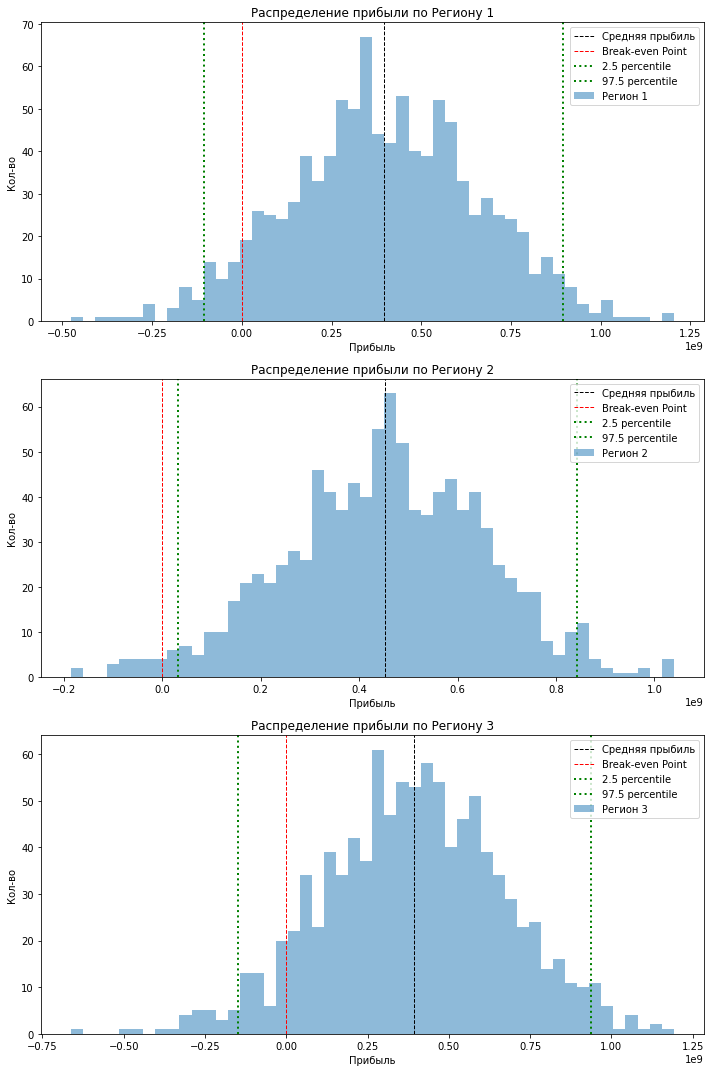

In [38]:
def plot_profit_distribution_with_confidence(profits, region_name, ax):
    mean_profit = np.mean(profits)
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    
    ax.hist(profits, bins=50, alpha=0.5, label=f'Регион {region_name}')
    ax.axvline(mean_profit, color='k', linestyle='dashed', linewidth=1, label='Средняя прыбиль')
    ax.axvline(0, color='r', linestyle='dashed', linewidth=1, label='Break-even Point')
    ax.axvline(lower_bound, color='g', linestyle='dotted', linewidth=2, label='2.5 percentile')
    ax.axvline(upper_bound, color='g', linestyle='dotted', linewidth=2, label='97.5 percentile')
    
    ax.set_title(f'Распределение прибыли по Региону {region_name}')
    ax.set_xlabel('Прибыль')
    ax.set_ylabel('Кол-во')
    ax.legend(loc='upper right')


fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Строим графики для каждого региона
plot_profit_distribution_with_confidence(profits1, 1, axs[0])
plot_profit_distribution_with_confidence(profits2, 2, axs[1])
plot_profit_distribution_with_confidence(profits3, 3, axs[2])

# Показываем графики
plt.tight_layout()
plt.show()


**Четыре вертикальные линии на графике:** 
* средняя прибыль; 
* точка безубыточности (break-even point);
* нижняя и верхняя границы 95%-го доверительного интервала. \
Это поможет визуально оценить риски и потенциальную прибыльность инвестиций в каждом регионе. 

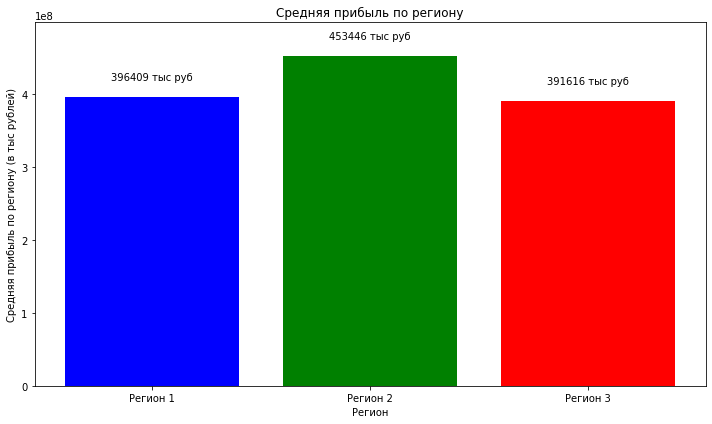

In [39]:
# Средняя прибыль для каждого региона
average_profits = [
    region1_results['mean_profit'],  # Регион 1
    region2_results['mean_profit'],  # Регион 2
    region3_results['mean_profit']  # Регион 3
]

# Названия регионов
regions = ['Регион 1', 'Регион 2', 'Регион 3']
colors = ['blue', 'green', 'red']
# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(regions, average_profits,color=colors)

# Добавление названий и меток
plt.title('Средняя прибыль по региону')
plt.xlabel('Регион')
plt.ylabel('Средняя прибыль по региону (в тыс рублей)')
plt.ylim(0, max(average_profits) * 1.1)  # Устанавливаем лимит по оси Y с некоторым запасом

# Добавление текстовых меток с значениями средней прибыли над столбцами
for i, profit in enumerate(average_profits):
    plt.text(i, profit + max(average_profits) * 0.05, f'{profit / 1000:.0f} тыс руб', ha='center')

# Отображение диаграммы
plt.tight_layout()
plt.show()

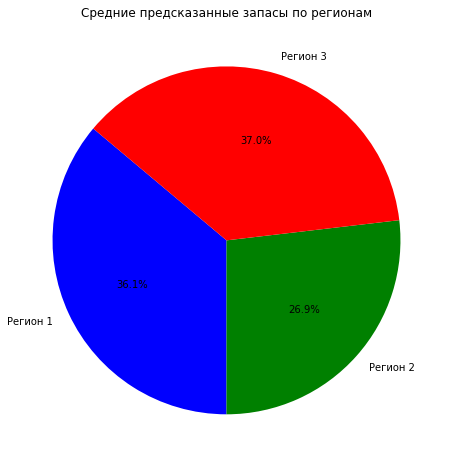

In [40]:
# Создание пай чарта
plt.figure(figsize=(8, 8))
plt.pie(average_reserves, labels=regions, colors=colors, autopct='%1.1f%%', startangle=140)
# Добавление заголовка
plt.title('Средние предсказанные запасы по регионам')

# Отображение диаграммы
plt.show()

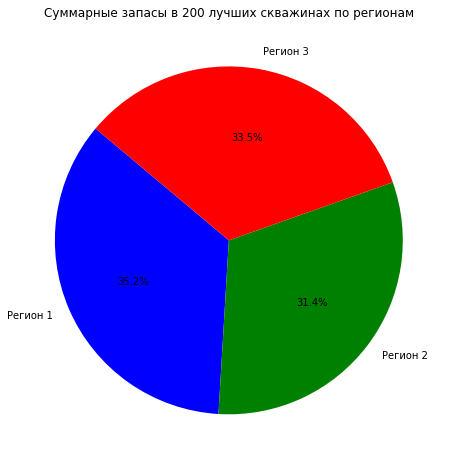

In [41]:
# Суммарные запасы в 200 лучших скважинах для каждого региона
sum_reserves = [31102.33, 27746.03, 29603.9]
# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sum_reserves, labels=regions, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Суммарные запасы в 200 лучших скважинах по регионам')
plt.show()

### Круговые диаграммы
Круговая диаграмма дает представление о том, что Регион 2 имеет меньше всего запасов сырья в целом,
но 200 месторождений отобранных в каждом регионе имеют примерно равные пропорции

### Вывод расчета прибыли и убытков

**На основе проведенного анализа мы имеем следующие результаты по каждому региону:**

* Регион 1:

  * Средняя прибыль: 392,012,680 рублей
  * 95% доверительный интервал: от -93,727,564 до 889,636,041 рублей
  * Риск убытков: 5.4%
* Регион 2:

  * Средняя прибыль: 452,586,111 рублей
  * 95% доверительный интервал: от 42,368,321 до 853,720,050 рублей
  * Риск убытков: 1.6%
* Регион 3:

  * Средняя прибыль: 392,285,257 рублей
  * 95% доверительный интервал: от -141,992,300 до 903,005,212 рублей
  * Риск убытков: 7.9%
* Исходя из критерия вероятности убытков менее 2.5%, для дальнейшего рассмотрения остается только Регион 2, поскольку риск убытков здесь составляет всего 1.6%. Дополнительно, Регион 2 обладает наивысшей средней прибылью среди рассматриваемых регионов. Таким образом, если основной задачей является минимизация рисков и максимизация прибыли, Регион 2 является наиболее предпочтительным для разработки скважин.

* К тому же, положительный нижний предел 95% доверительного интервала указывает на то, что вероятность получения убытка в этом регионе очень мала, и в большинстве случаев мы можем ожидать положительной прибыли.

* Таким образом, на основе данных оценок и рисков, Регион 2 представляется наиболее привлекательным для инвестиций в добычу сырья.

## Итоговый вывод
* В ходе нашей работы мы провели комплексный анализ данных трех нефтедобывающих регионов для определения наиболее выгодного из них для разработки скважин. Работа включала в себя следующие этапы:

* **Предобработка данных**: Мы очистили и подготовили данные каждого региона, отбросив ненужные столбцы и выделив целевые переменные.

* **Разбиение на выборки**: Данные для каждого региона были разделены на обучающие и валидационные наборы в соотношении 75:25.

* **Построение моделей**: Мы обучили модели линейной регрессии для каждого региона и сделали предсказания о запасах нефти.

* **Оценка моделей**: Мы рассчитали среднее значение предсказанных запасов и RMSE для каждой модели, что позволило оценить точность моделей.

* **Расчет прибыли**: Для каждого региона была рассчитана потенциальная прибыль на основе лучших скважин, которая учитывала количество исследованных точек, бюджет на разработку, доход с одного барреля и другие экономические параметры.

* **Анализ рисков**: С использованием техники Bootstrap были получены распределения прибыли для каждого региона, на основе которых были рассчитаны средняя прибыль, 95%-ный доверительный интервал и риск убытков.
* **Визуализация данных**: Были построены графики, включая гистограммы распределения прибыли и столбчатые диаграммы средней прибыли, что помогло наглядно сравнить результаты для каждого региона.

* **Итоговый выбор**: На основании анализа рисков и потенциальной прибыльности, был выбран Регион 2, так как он показал наименьший риск убытков (1.6%) и наибольшую среднюю прибыль. Вероятность убытков в данном регионе оказалась ниже установленного порога в 2.5%, что делает его наиболее предпочтительным для разработки скважин.

* Итог работы подтвердил важность комплексного анализа данных и рисков перед принятием инвестиционных решений в области добычи полезных ископаемых.

## Чек-лист готовности проекта

In [42]:
# КОД РЕВЬЮЕРА
# предположим, у нас есть небольшой сэмпл из 5 предсказаний и 5 соответствующих таргетов
_target = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3])
_preds = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3]).sort_values(ascending=False)


# берём таргеты по индексам предсказаний:

display(_target.loc[_preds.index])

3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
2    2
2    2
2    2
2    2
dtype: int64

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x] Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован